In [5]:
import numpy as np
import yfinance as yf
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import timedelta
from datetime import date

In [2]:
stocksymbols = ['KNIP11.SA','HGLG11.SA','ITSA4.SA','VALE3.SA','SPXI11.SA']

print(f"You have {len(stocksymbols)} assets in your porfolio" )


You have 5 assets in your porfolio


In [3]:

yf.Ticker("BIL").history(start=earlier,end=now)[["Close"]]

,Close
Date,
2024-06-28 00:00:00-04:00,91.779999


In [4]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2022, 1, 1)
end = datetime(2023, 3, 31)
aud = web.DataReader('BRL=X', 'yahoo', start, end)

AttributeError: 'NoneType' object has no attribute 'group'

In [7]:
startdate = date.today()
end_date = startdate - timedelta(days=1)
df = pd.DataFrame()
for ticker in stocksymbols:

    data = yf.Ticker(ticker).history(start=end_date,end=end_date)[["Close"]]
    data.columns = [ticker]

    if np.size(df) == 0:
        df = data
    else:
        df = df.join(data)


In [9]:
df

,KNIP11.SA,HGLG11.SA,ITSA4.SA,VALE3.SA,SPXI11.SA
Date,,,,,
2024-06-07 00:00:00-03:00,96.139999,161.240005,9.7,60.41,308.570007


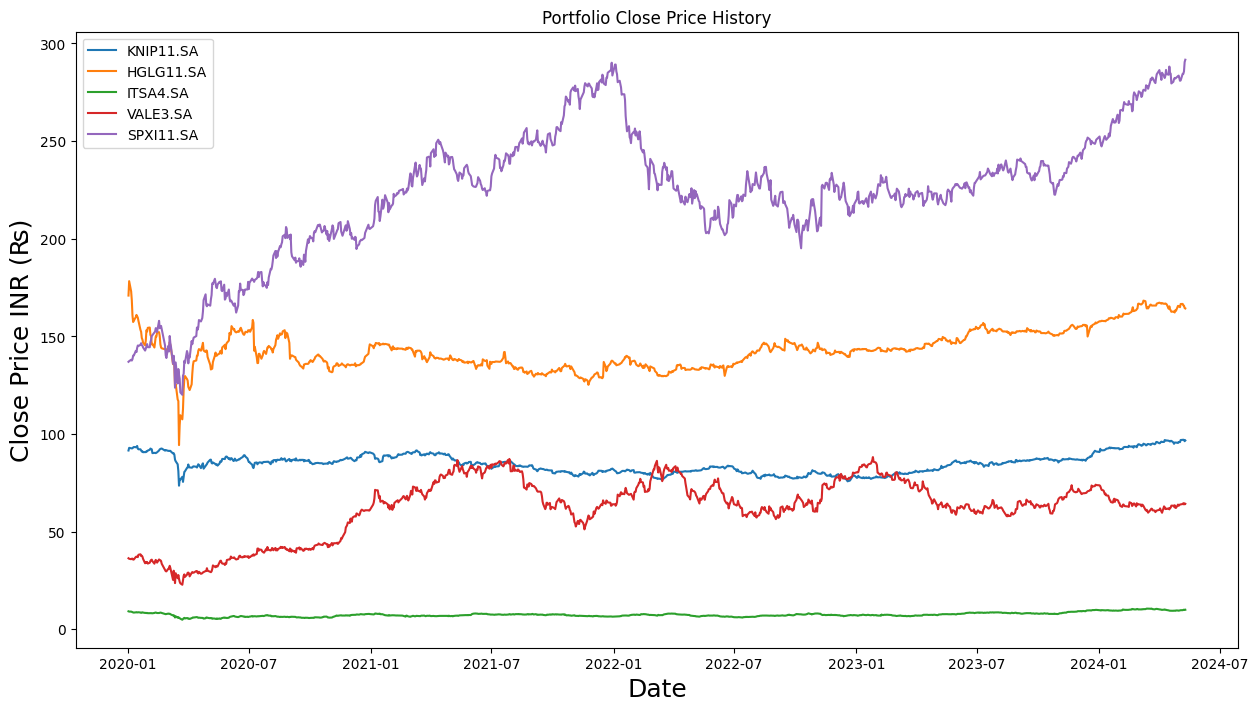

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)

Correlation between Stocks in your portfolio


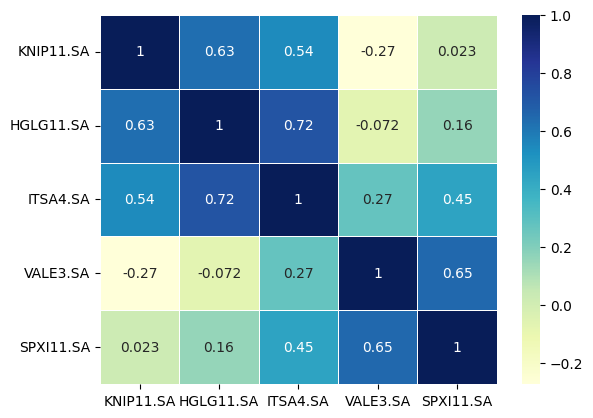

In [58]:
correlation_matrix = df.corr(method='pearson')
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

Daily simple returns


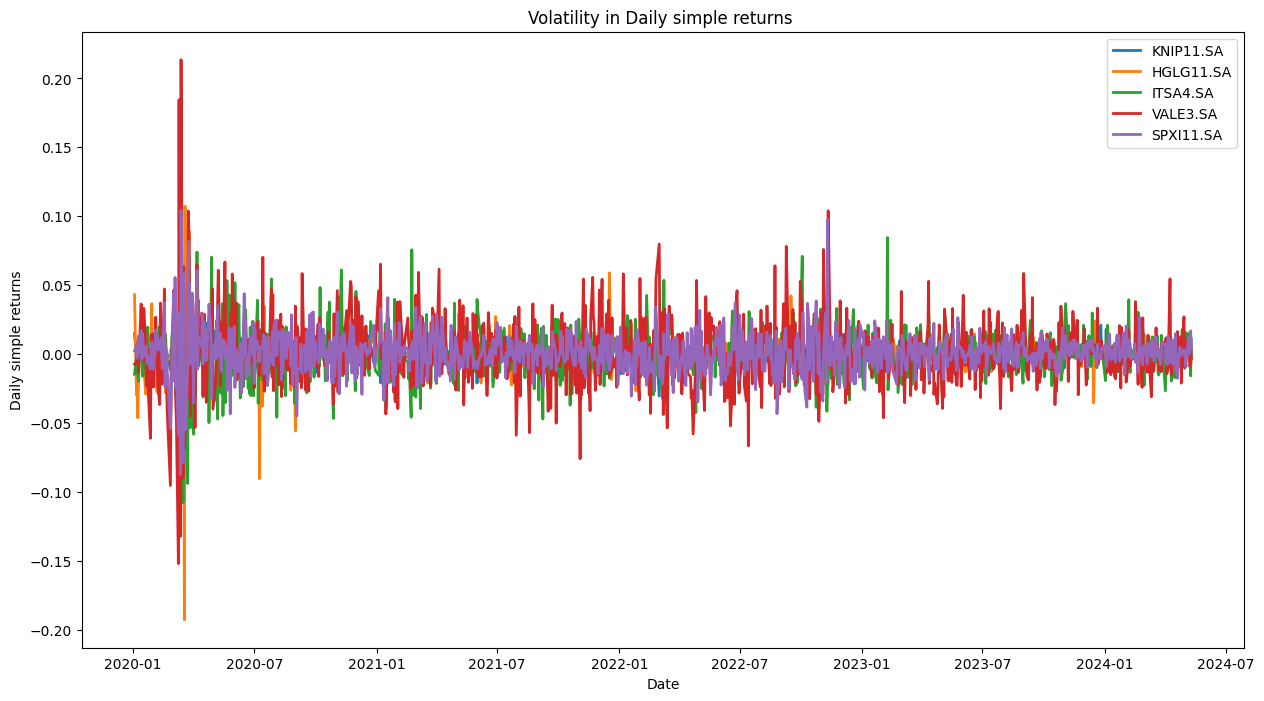

In [65]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

Cummulative Returns


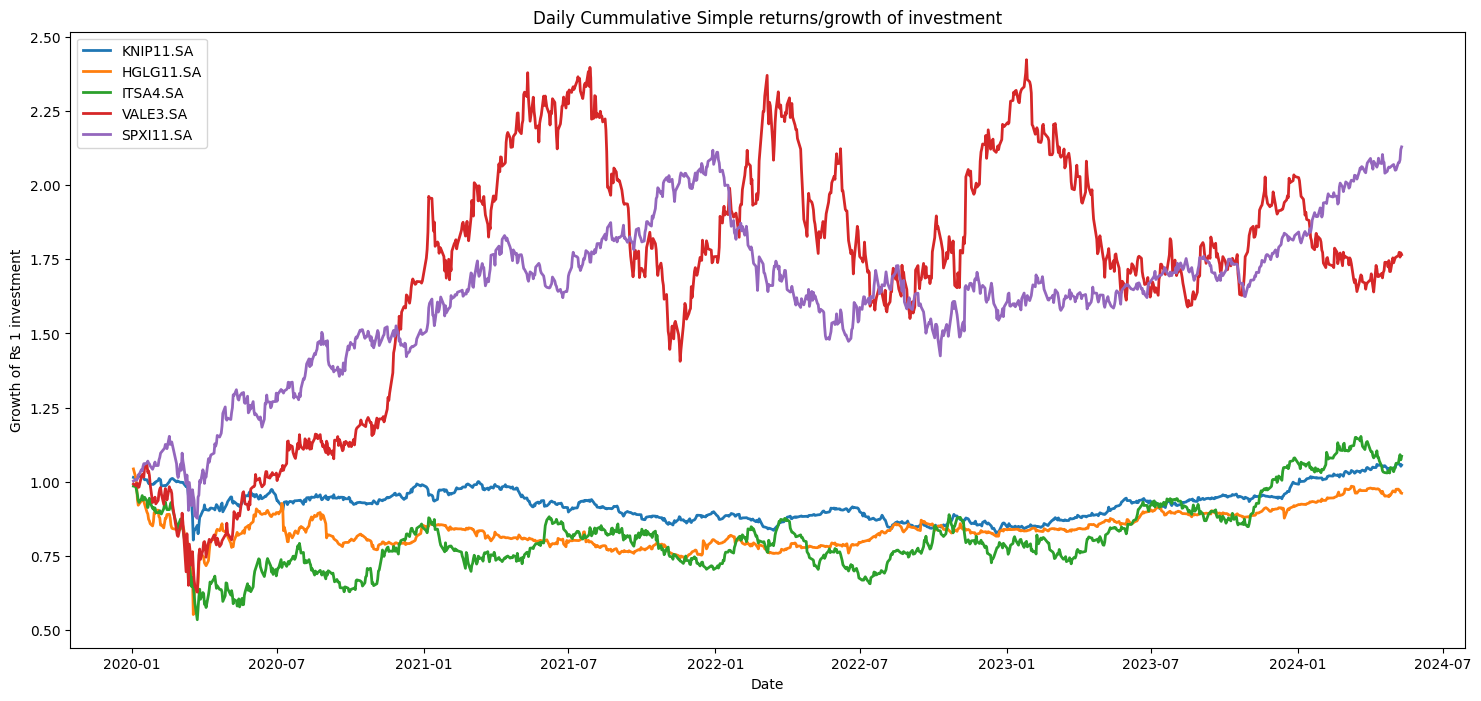

In [66]:
#visualize the daily cummulative simple return
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()

print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)